<a href="https://colab.research.google.com/github/sara87821/20210602/blob/main/05_Keras_ImageDataGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
# one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
# Keras Augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True, 
    # vertical_flip=True
)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

In [ ]:
model = keras.Sequential([
    keras.layers.InputLayer((32, 32, 3)),                 
    keras.layers.Conv2D(16, 3),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam')

In [ ]:
model.fit(datagen.flow(x_train, y_train, batch_size=32),
          validation_data=(x_test, y_test),
          steps_per_epoch=len(x_train) / 32, 
          epochs=10)

In [ ]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

img = io.imread('https://upload.wikimedia.org/wikipedia/zh/3/34/Lenna.jpg')
imgs = np.stack([img]*10)

datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.5,
    height_shift_range=0.5,
    vertical_flip=True,
    
    validation_split=0.5
)
datagen.fit(imgs)

In [ ]:
x_train = datagen.flow(imgs, batch_size=5, subset='training')

In [ ]:
x_val = datagen.flow(imgs, batch_size=5, subset='validation')

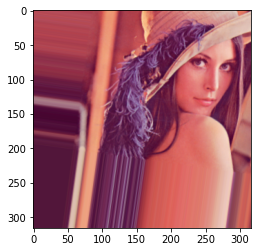

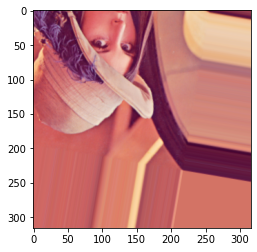

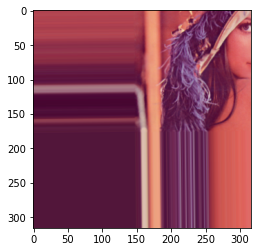

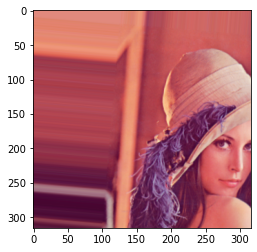

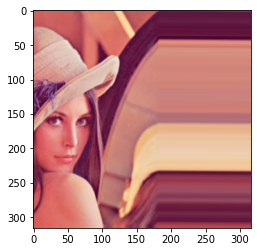

In [ ]:
# train
for img_batch in x_train:
    for img in img_batch:
        img = img.copy().astype(int)
        plt.imshow(img)
        plt.show()
    break

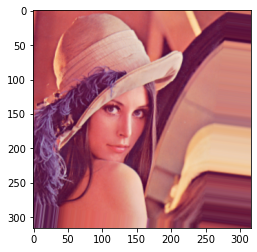

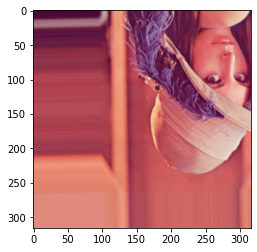

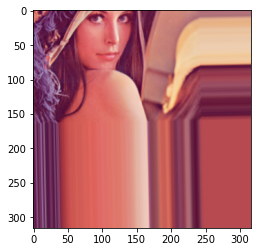

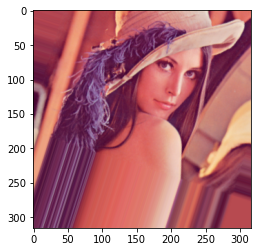

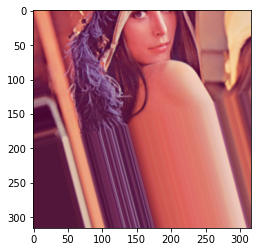

In [ ]:
# val
for img_batch in x_val:
    for img in img_batch:
        img = img.copy().astype(int)
        plt.imshow(img)
        plt.show()
    break